# ¡Hola  !🙋🏻‍♂️

Te escribe Lisandro Saez, soy revisor de código en Tripleten y tengo el agrado de revisar el proyecto que entregaste.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberías hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos pequeños errores pueden hacer que un candidato sea rechazado.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma (no te preocupes, no es obligatorio):

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Hola, muchas gracias por tus comentarios y la revisión.
</div>

¡Empecemos!

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# leer conjuntos de datos en los DataFrames
df_order = pd.read_csv ('/datasets/instacart_orders.csv',sep=';')
df_product = pd.read_csv ('/datasets/products.csv',sep=';')
df_aisle = pd.read_csv ('/datasets/aisles.csv',sep=';')
df_department = pd.read_csv ('/datasets/departments.csv',sep=';')
df_reorder = pd.read_csv ('/datasets/order_products.csv',sep=';')


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho! Siempre es importante que pasemos el set de datos que estamos usando a `DataFrame`!</div>



In [3]:
# mostrar información del DataFrame
df_order.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0


In [4]:
df_order.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [5]:
# mostrar información del DataFrame
df_product.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [6]:
df_product.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
# mostrar información del DataFrame
df_aisle.head(10)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [8]:
df_aisle.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [9]:
# mostrar información del DataFrame
df_department.head(10)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [10]:
df_department.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [11]:
# mostrar información del DataFrame
df_reorder.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1


In [12]:
df_reorder.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB





<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran uso de `show_counts`!


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
- En los 5 data frames podemos ver que todas las columnas están separadas por punto y coma ( ; ), de esta manera es necesario especificar en el inicio de la lectura en el inicio de la lectura del data frame con el comando sep el separador de ( ; ).

-	En el primer DataFrame (df_order) todas las columnas excepto la ultima (‘days_since_prior_order’) tienen una fila nula y están con tipo de datos entero.
-	En el segundo DataFrame (df_products) la columna 2 (‘product_name’) tiene tipo de datos ‘object’ y tiene 1258 datos nulos.
-	En el tercer DataFrame (df_aisle) ninguna columna tiene datos nulos, la primera columna es de tipo entero y la segunda de tipo object.
-	En el cuarto DataFrame (df_department) ninguna columna tiene datos nulos, la primera columna es de tipo entero y la segunda de tipo object.
-	En el quinto DataFrame (df_reorder) la tercera columna’ add_to_cart_order’ tiene 836 datos nulos y tipo de dato float.




<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
Bien hecho! Siempre es importante completar las conclusiones ya que te guiarán por todo el sprint.    


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

1. Manejo de Valores Nulos
-	Identificar valores faltantes.
-	Reemplazar o eliminar según el contexto.
2. Manejo de Datos Duplicados
-	Verificar si existen registros duplicados.
-	Eliminar duplicados si es necesario.
3. Conversión de Tipos de Datos
-	Asegurar que cada columna tenga el tipo de dato correcto.



<div class="alert alert-block alert-warning">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
Es ideal que siempre elaboremos un plan de solución antes de ponernos con los ejercicios.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [13]:
# Revisa si hay pedidos duplicados
order_dupli = df_order[df_order.duplicated(keep=False)]
print(order_dupli)
print()
print(df_order.duplicated().sum())# Contar duplicados explícitos

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
242618   1021560    53767             3          3                  2   
250626    467134    63189            21          3 

In [14]:
order_dupli.head(30)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
30371,1918001,188546,14,3,2,16.0
99462,794638,50898,24,3,2,2.0
119251,408114,68324,4,3,2,18.0
142258,2845099,31189,11,3,2,7.0
145574,794638,50898,24,3,2,2.0
164581,1112182,202304,84,3,2,6.0
200059,1782114,106752,1,3,2,NaN
204042,2125197,14050,48,3,2,3.0
215294,2160484,107525,16,3,2,30.0
223105,2160484,107525,16,3,2,30.0


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
- Todas las ordenes fueron realizadas el día miércoles a las 2 am

In [15]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
order_dupli.sort_values(by='user_id').head(30) #ordenar los datos duplicados para tener una mejor visualización. 

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
441599,2125197,14050,48,3,2,3.0
204042,2125197,14050,48,3,2,3.0
142258,2845099,31189,11,3,2,7.0
284038,2845099,31189,11,3,2,7.0
99462,794638,50898,24,3,2,2.0
145574,794638,50898,24,3,2,2.0
242618,1021560,53767,3,3,2,9.0
311713,1021560,53767,3,3,2,9.0
371905,391768,57671,19,3,2,10.0
354993,391768,57671,19,3,2,10.0


¿Qué sugiere este resultado?

In [16]:
# Elimina los pedidos duplicados
df_order.drop_duplicates(inplace=True)

In [17]:
# Vuelve a verificar si hay filas duplicadas
print(df_order.duplicated().sum())

0



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Está excelente que te tomes el trabajo extra de revisar que hayan quedado eliminados todos los duplicados!
</div>


In [18]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
df_order['order_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos
- No se encontraron valores duplicados en la coumna 'order_id'

### `products` data frame

In [19]:
# Verifica si hay filas totalmente duplicadas
df_product.duplicated().sum()

0

In [20]:
df_product.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [21]:
# Revisa únicamente si hay ID de departamentos duplicados
df_product['department_id'].duplicated().sum()

49673

In [22]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_product['product_name'] = df_product['product_name'].str.upper()
print(df_product['product_name'].head())

0                           CHOCOLATE SANDWICH COOKIES
1                                     ALL-SEASONS SALT
2                 ROBUST GOLDEN UNSWEETENED OOLONG TEA
3    SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4                            GREEN CHILE ANYTIME SAUCE
Name: product_name, dtype: object


In [23]:
# Revisa si hay nombres duplicados de productos no faltantes
df_product['product_name'].duplicated().sum()

1361

In [24]:
print('Cantidad de valores duplicados en la columna (product_name):',df_product['product_name'].duplicated().sum())
print()
print('Cantidad de valores duplicados en la columna (departament_id):',df_product['department_id'].duplicated().sum())

Cantidad de valores duplicados en la columna (product_name): 1361

Cantidad de valores duplicados en la columna (departament_id): 49673


In [25]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.
- En la columna 'product_name' se encontraron 1361 valores duplicados, que a su vez son valorea faltantes.
- En la columna 'department_id' hay 4973 duplicados.

### `departments` data frame

In [26]:
# Revisa si hay filas totalmente duplicadas
depart_dupli = df_department[df_department.duplicated(keep=False)]
print(depart_dupli)
print()
print(df_department.duplicated().sum())

Empty DataFrame
Columns: [department_id, department]
Index: []

0


In [27]:
# Revisa únicamente si hay IDs duplicadas de productos
print('Cantidad de valores duplicados en la columna (departament_id):',df_department['department_id'].duplicated().sum())

Cantidad de valores duplicados en la columna (departament_id): 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `aisles` data frame

In [28]:
# Revisa si hay filas totalmente duplicadas
aisle_dupli = df_aisle[df_aisle.duplicated(keep=False)]
print(aisle_dupli)
print()
print(df_aisle.duplicated().sum())

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []

0


In [29]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print('Cantidad de valores duplicados en la columna (aisle_id):',df_aisle['aisle_id'].duplicated().sum())

Cantidad de valores duplicados en la columna (aisle_id): 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [30]:
# Revisa si hay filas totalmente duplicadas
order_prod_dupli = df_reorder[df_reorder.duplicated(keep=False)]
print(order_prod_dupli)
print()
print(df_reorder.duplicated().sum())

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []

0


In [31]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print('Cantidad de valores duplicados en la columna (order_id):',df_reorder['order_id'].duplicated().sum())

Cantidad de valores duplicados en la columna (order_id): 4094961


In [32]:
df_reorder.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


Describe brevemente tus hallazgos y lo que hiciste con ellos.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Todas las validaciones y conteos de duplicados están bien hechas! Gran trabajo!
</div>

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [33]:
# Encuentra los valores ausentes en la columna 'product_name'
df_product.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [34]:
print(df_product[df_product.isna().any(axis=1)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


In [35]:
print(df_product[df_product['aisle_id'] == 100])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

In [36]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(df_aisle[df_aisle['aisle_id'] == 100])
print()
df_aisle.info()
print()
print(df_aisle.iloc[95:105])

    aisle_id    aisle
99       100  missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

     aisle_id                       aisle
95         96                  lunch meat
96         97       baking supplies decor
97         98               juice nectars
98         99     canned fruit applesauce
99        100                     missing
100       101      air fresheners candles
101       102         baby bath body care
102       103          ice cream toppings
103       104           spices seasonings
104       105  doughs gelatins bake mixes


Describe brevemente cuáles son tus hallazgos.

In [37]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_department[df_department['department_id'] == 21])
print()
df_department.info()
print()
print(df_department.head(10))

    department_id department
20             21    missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes

   department_id       department
0              1           frozen
1              2            other
2              3           bakery
3              4          produce
4              5          alcohol
5              6    international
6              7        beverages
7              8             pets
8              9  dry goods pasta
9             10             bulk


Describe brevemente cuáles son tus hallazgos.

In [38]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

df_department[df_department['department_id'] == 21]

,department_id,department
20,21,missing


In [39]:
df_aisle[df_aisle['aisle_id']==100]

,aisle_id,aisle
99,100,missing



<div class="alert alert-block alert-warning">
<b>Comentario del revisor - Iteración 1</b> <a class="tocSkip"></a>

Recuerda que debes resolver todos los ejercicios.</div>

Describe brevemente cuáles son tus hallazgos.

- Para [´aisle_id´]==100 al igual que para ['department_id']==21 el valor es (missing), esto quiere decir, que no está definido.

In [40]:
# Completa los nombres de productos ausentes con 'Unknown'
df_product['product_name'] = df_product['product_name'].fillna('Unknown')
df_product.isna().sum()
print()
print(df_product[df_product['aisle_id'] == 100])


       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `orders` data frame

In [41]:
# Encuentra los valores ausentes
df_order.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [42]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(df_order[df_order.isna().any(axis=1)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo contextualizando los valores ausentes!
</div>

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [43]:
# Encuentra los valores ausentes
df_reorder.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [44]:
print(df_reorder[df_reorder.isna().any(axis=1)])

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [45]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('El valor minimo de la columna add_to_cart_order es:',df_reorder['add_to_cart_order'].min())
print()
print('El valor minimo de la columna add_to_cart_order es:',df_reorder['add_to_cart_order'].max())

El valor minimo de la columna add_to_cart_order es: 1.0

El valor minimo de la columna add_to_cart_order es: 64.0


Describe brevemente cuáles son tus hallazgos.

In [46]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_id_na = df_reorder[df_reorder.isna().any(axis=1)]['order_id'].unique()
print(order_id_na)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [47]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
order_group = df_reorder[df_reorder['order_id'].isin(order_id_na)].groupby('order_id')
order_group.head()
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


,order_id,product_id,add_to_cart_order,reordered
267,2094761,31469,57.0,1
737,2449164,5068,NaN,0
1742,2997021,4920,37.0,0
3463,871281,40063,61.0,1
3535,171934,36397,7.0,0
...,...,...,...,...
607447,2170451,38200,18.0,1
650703,1916118,47766,32.0,1
722943,1598369,47335,59.0,1
838640,1598369,7631,4.0,1


In [48]:
order_counts = order_group['product_id'].count().min()
print(order_counts)

65



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen análisis de valores ausentes!
</div>

Describe brevemente cuáles son tus hallazgos.

In [49]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_reorder['add_to_cart_order'] = df_reorder['add_to_cart_order'].fillna('999')
df_reorder['add_to_cart_order'] = df_reorder['add_to_cart_order'].astype('int')
print(df_reorder.isna().sum())
print()
df_reorder.info()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy correcto todo tu trabajo con respecto a valores ausentes. Bien hecho!
</div>


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [50]:
print('Hora mínima del día: ',df_order['order_hour_of_day'].min())
print()
print('Hora máxima del día: ',df_order['order_hour_of_day'].max())
print()
print('Día mínimo de la semana: ',df_order['order_dow'].min())
print()
print('Día máximo de la semana: ',df_order['order_dow'].max())

Hora mínima del día:  0

Hora máxima del día:  23

Día mínimo de la semana:  0

Día máximo de la semana:  6



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Está muy bien la comprobación que hiciste sobre la sensibilidad de los valores.
</div>


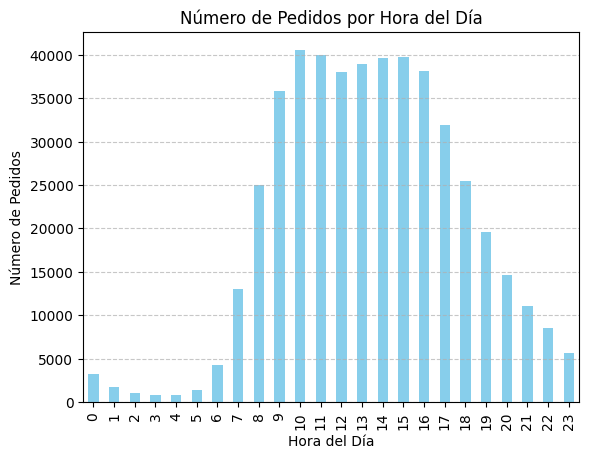

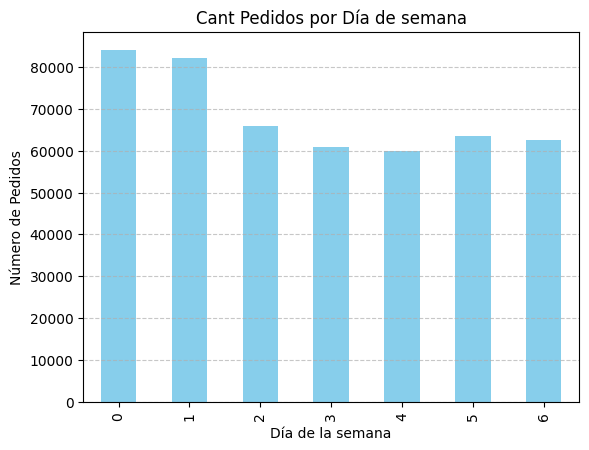

AttributeError: 'Line2D' object has no property 'bins'

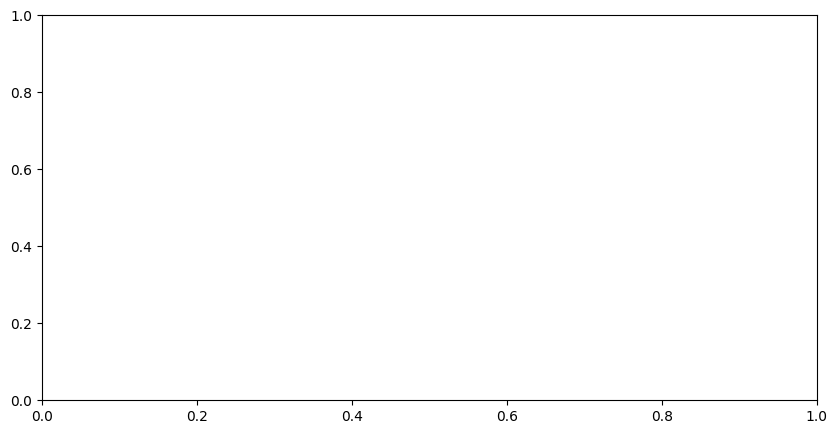

In [92]:
order_counts_by_hour = df_order["order_hour_of_day"].value_counts().sort_index()
order_counts_by_hour.plot(
    x="order_hour_of_day",
    y="order_count",
    kind="bar",
    title="Número de Pedidos por Hora del Día",
    xlabel="Hora del Día",
    ylabel="Número de Pedidos",
    legend=False,
    color="skyblue"
)

# Mostrar el gráfico Horas del día.
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Día de la semana en el que gente hace sus compras.
order_counts_by_day = df_order["order_dow"].value_counts().sort_index()
order_counts_by_day.plot(
    x="order_dow",
    y="order_count",
    kind="bar",
    title="Cant Pedidos por Día de semana",
    xlabel="Día de la semana",
    ylabel="Número de Pedidos",
    legend=False,
    color="skyblue"
)

# Mostrar el gráfico semanal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Tiempo que la gente espera hasta hacer su siguiente pedido
df_order_filtered = df_order.dropna(subset=['days_since_prior_order'])
plt.figure(figsize=(10, 5))
sns.histplot(df_order_filtered['days_since_prior_order'], 
             bins=30, 
             color='skyblue')

plt.title('Distribución del Tiempo hasta el Siguiente Pedido')
plt.xlabel('Días desde el Pedido Anterior')
plt.ylabel('Frecuencia')

# Mostrar valores mínimo y máximo
min_days = df_order_filtered['days_since_prior_order'].min()
max_days = df_order_filtered['days_since_prior_order'].max()

plt.axvline(min_days, color='red', linestyle='dashed', label=f'Mínimo: {min_days} días')
plt.axvline(max_days, color='green', linestyle='dashed', label=f'Máximo: {max_days} días')

plt.legend()
plt.show()

Escribe aquí tus conclusiones

# Distribución de pedidos por hora del día

- La mayoría de los pedidos se realizan entre las 9 AM y las 4 PM, con un pico alrededor de las 10-11 AM.
- Hay muy pocos pedidos en la madrugada (entre las 12 AM y las 6 AM), lo cual es esperable.
- A partir de las 5 PM, los pedidos comienzan a disminuir gradualmente.

# Pedidos por día de la semana

- Los días con mayor cantidad de pedidos son el domingo (0) y el lunes (1).
- A mitad de semana (martes a jueves) los pedidos disminuyen, alcanzando el punto más bajo el miércoles o jueves.
- Hacia el fin de semana, la cantidad de pedidos vuelve a aumentar.

# Tiempo entre pedidos

- La mayoría de los clientes realizan su siguiente pedido dentro de los primeros 7 días, lo que sugiere compras frecuentes.
- Hay picos notables en ciertos intervalos, posiblemente reflejando hábitos de compra regulares (por ejemplo, cada semana o cada mes).
- Un número significativo de clientes espera hasta 30 días para volver a comprar, lo que podría indicar compras mensuales o de productos no perecederos.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

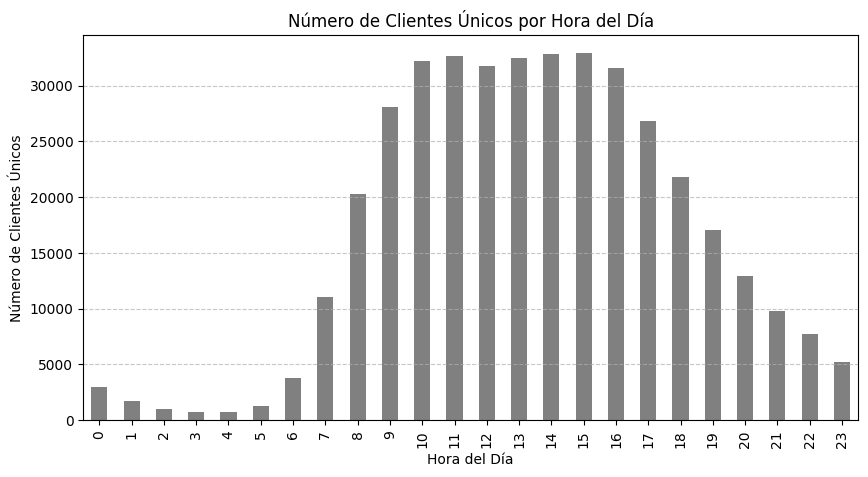

In [52]:
unique_customers_by_hour = df_order.groupby("order_hour_of_day")["user_id"].nunique()

# Graficar el número de clientes únicos por hora del día
plt.figure(figsize=(10, 5))
unique_customers_by_hour.plot(
    kind="bar",
    color="gray",
    title="Número de Clientes Únicos por Hora del Día",
    xlabel="Hora del Día",
    ylabel="Número de Clientes Únicos"
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



<div class="alert alert-block alert-warning">
<b>Comentario del revisor - Iteración 1</b> <a class="tocSkip"></a>

Recuerda que debes completar todos los ejercicios para aprobar el sprint. Ten en cuenta que siempre puedes contactarte con tus tutores si tienes alguna duda sobre cómo abordar un ejercicio en particular

Nota: Este comentario aplica a todos los ejercicios a partir de aquí.</div>




Escribe aquí tus conclusiones

- La gráfica muestra la cantidad de clientes únicos que realizan pedidos en cada hora del día. Se observa que la actividad comienza a aumentar alrededor de las 6-7 a.m., alcanzando su punto máximo entre las 10 a.m. y las 3 p.m. Luego, la actividad comienza a disminuir gradualmente después de las 4 p.m., con una caída más pronunciada a partir de las 8 p.m. hasta la medianoche.

### [A3] ¿Qué día de la semana compran víveres las personas?

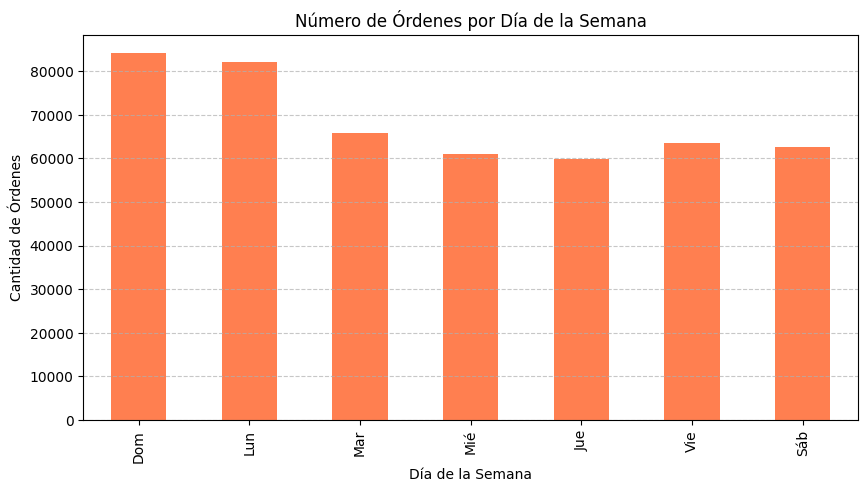

In [53]:
orders_by_day = df_order.groupby("order_dow")["order_id"].count()

plt.figure(figsize=(10, 5))
orders_by_day.plot(
    kind="bar",
    color="coral",
    title="Número de Órdenes por Día de la Semana",
    xlabel="Día de la Semana",
    ylabel="Cantidad de Órdenes"    
)

plt.xticks(ticks=range(7), labels=["Dom", "Lun", "Mar", "Mié", "Jue", "Vie", "Sáb"])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones

- El gráfico muestra un ciclo semanal claro, con picos de compras los domingos y lunes, seguido de una baja entre semana y un aumento antes del fin de semana. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

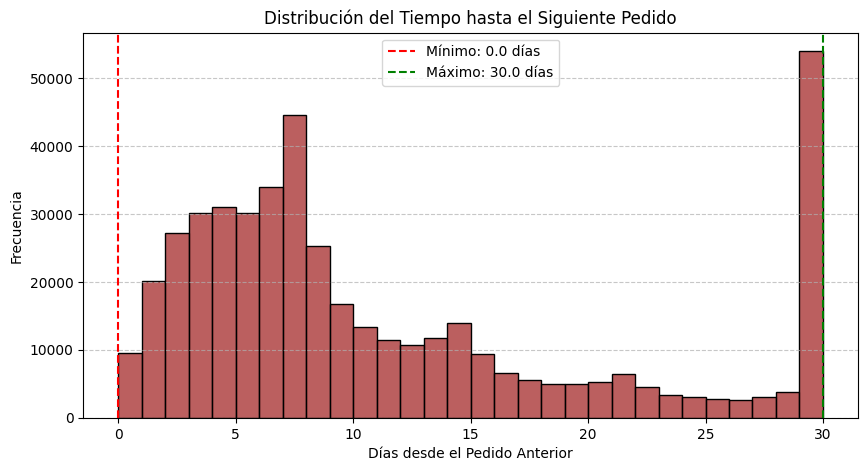

In [54]:
df_order_filtered = df_order.dropna(subset=['days_since_prior_order'])
plt.figure(figsize=(10, 5))
sns.histplot(df_order_filtered['days_since_prior_order'], 
             bins=30, 
             color='brown')

plt.title('Distribución del Tiempo hasta el Siguiente Pedido')
plt.xlabel('Días desde el Pedido Anterior')
plt.ylabel('Frecuencia')

# Mostrar valores mínimo y máximo
min_days = df_order_filtered['days_since_prior_order'].min()
max_days = df_order_filtered['days_since_prior_order'].max()

plt.axvline(min_days, color='red', linestyle='dashed', label=f'Mínimo: {min_days} días')
plt.axvline(max_days, color='green', linestyle='dashed', label=f'Máximo: {max_days} días')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Escribe aquí tus conclusiones

- Los ciclos de compra predominantes son semanal y mensual, con una menor cantidad de clientes que hacen pedidos en otros intervalos. Esto es clave para estrategias de marketing y gestión de inventarios.



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buena esta sección. Los gráficos son muy claros y descriptivos. Muy bien al usar títulos y descripciones de los ejes.
</div>



# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [66]:
# Filtrar pedidos para miércoles (order_dow = 3) y sábado (order_dow = 6)
wed_orders = df_order[df_order['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
sat_orders = df_order[df_order['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()
print(wed_orders)
print()
print(sat_orders)

0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_hour_of_day, dtype: int64

0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: order_hour_of_day, dtype: int64


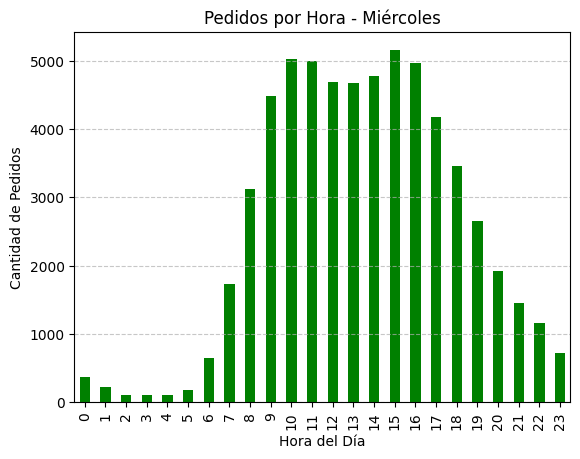

In [70]:
wed_orders.plot(x=wed_orders.index,
                y=wed_orders.values,
                color='green',
                title="Pedidos por Hora - Miércoles",
                xlabel="Hora del Día",
                ylabel="Cantidad de Pedidos",
                kind='bar'
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

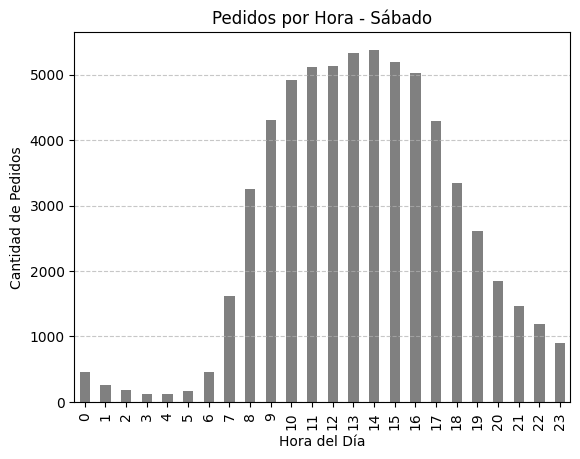

In [71]:
sat_orders.plot(x=sat_orders.index,
                y=sat_orders.values,
                color='gray', 
                title="Pedidos por Hora - Sábado",
                xlabel="Hora del Día",
                ylabel="Cantidad de Pedidos",
                kind='bar'
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

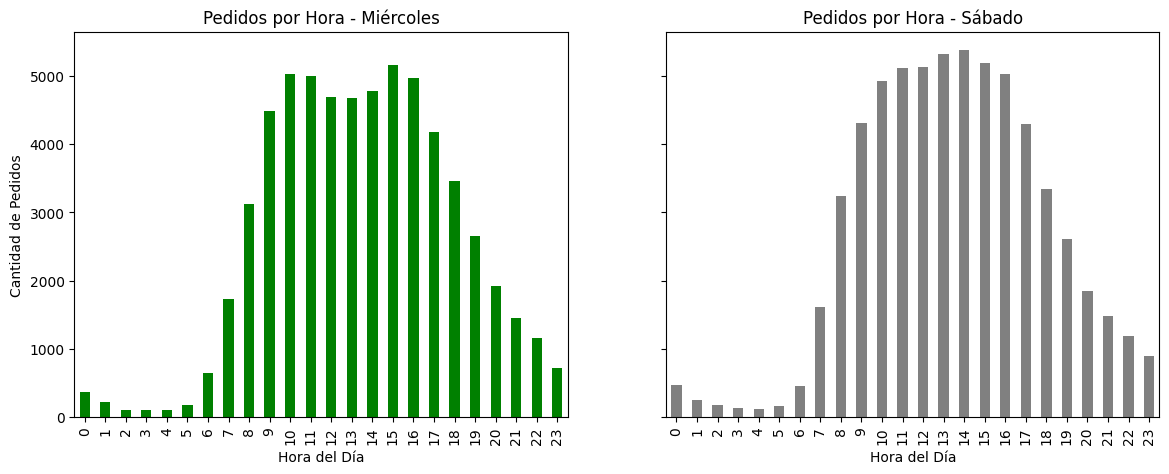

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
wed_orders.plot(ax=axes[0],x=wed_orders.index,
                y=wed_orders.values,
                color='green',
                title="Pedidos por Hora - Miércoles",
                xlabel="Hora del Día",
                ylabel="Cantidad de Pedidos",
                kind='bar'
)

sat_orders.plot(ax=axes[1],x=sat_orders.index,
                y=sat_orders.values,
                color='gray', 
                title="Pedidos por Hora - Sábado",
                xlabel="Hora del Día",
                ylabel="Cantidad de Pedidos",
                kind='bar'
)

plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Está muy bien la comparación de ambos días en general. De nuevo, la visualización es muy clara.
</div>



<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recomendaría utilizar un gráfico de doble barra en lugar de dos gráficos de barras.</div>


Escribe aquí tus conclusiones
- Ambos días muestran un patrón similar, con un pico de pedidos a media mañana y una disminución progresiva por la tarde-noche.
- Los sábados hay más pedidos en casi todas las horas del día en comparación con los miércoles, lo que sugiere que más personas hacen compras los fines de semana.
- La actividad en las primeras horas de la mañana y en la noche es baja en ambos días, pero los sábados tienen un ligero aumento en pedidos nocturnos en comparación con los miércoles.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [85]:
orders_per_user = df_order.groupby('user_id')['order_id'].count()
print(orders_per_user)

user_id
2         2
4         2
5         1
6         2
7         2
         ..
206203    1
206206    7
206207    5
206208    9
206209    2
Name: order_id, Length: 157437, dtype: int64


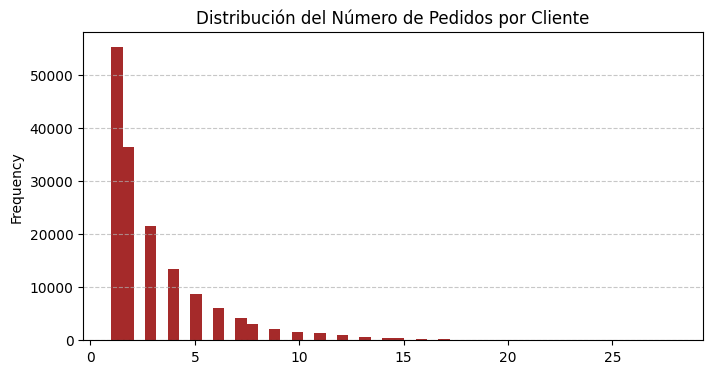

In [86]:
plt.figure(figsize=(8, 4))
orders_per_user.plot(kind='hist',
                    bins=50,
                    color='brown',
                    title='Distribución del Número de Pedidos por Cliente',
                    xlabel='Número de Pedidos',
                    ylabel='Frecuencia'
)                    
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.show()

Escribe aquí tus conclusiones

- Distribución sesgada a la derecha: La mayoría de los clientes ha realizado pocos pedidos, mientras que un pequeño grupo ha hecho muchos.
- Alta frecuencia en los primeros valores: La mayor cantidad de clientes ha realizado entre 1 y 5 pedidos, lo que sugiere que hay muchos usuarios ocasionales.
- Cola larga: Hay algunos clientes que han hecho hasta 25 pedidos, lo que indica la presencia de clientes leales y recurrentes.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [89]:
df_merged = df_reorder.merge(df_product, on='product_id', how='left')
print(df_merged)

         order_id  product_id  add_to_cart_order  reordered  \
0         2141543       11440                 17          0   
1          567889        1560                  1          1   
2         2261212       26683                  1          1   
3          491251        8670                 35          1   
4         2571142        1940                  5          1   
...           ...         ...                ...        ...   
4545002    577211       15290                 12          1   
4545003   1219554       21914                  9          0   
4545004    692640       47766                  4          1   
4545005    319435         691                  8          1   
4545006   1398151       28733                  9          0   

                                              product_name  aisle_id  \
0                           CHICKEN BREAST TENDERS BREADED       129   
1                                               BAG OF ICE        37   
2        CAFE LATTE PURE LI

In [91]:
# Contar los productos más vendidos
top_products = df_merged['product_name'].value_counts().head(20)
print(top_products)

BANANA                      66050
BAG OF ORGANIC BANANAS      53297
ORGANIC STRAWBERRIES        37039
ORGANIC BABY SPINACH        33971
ORGANIC HASS AVOCADO        29773
ORGANIC AVOCADO             24689
LARGE LEMON                 21495
STRAWBERRIES                20018
LIMES                       19690
ORGANIC WHOLE MILK          19600
ORGANIC RASPBERRIES         19197
ORGANIC YELLOW ONION        15898
ORGANIC GARLIC              15292
ORGANIC ZUCCHINI            14584
ORGANIC BLUEBERRIES         13879
CUCUMBER KIRBY              13675
ORGANIC FUJI APPLE          12544
ORGANIC LEMON               12232
APPLE HONEYCRISP ORGANIC    11993
ORGANIC GRAPE TOMATOES      11781
Name: product_name, dtype: int64


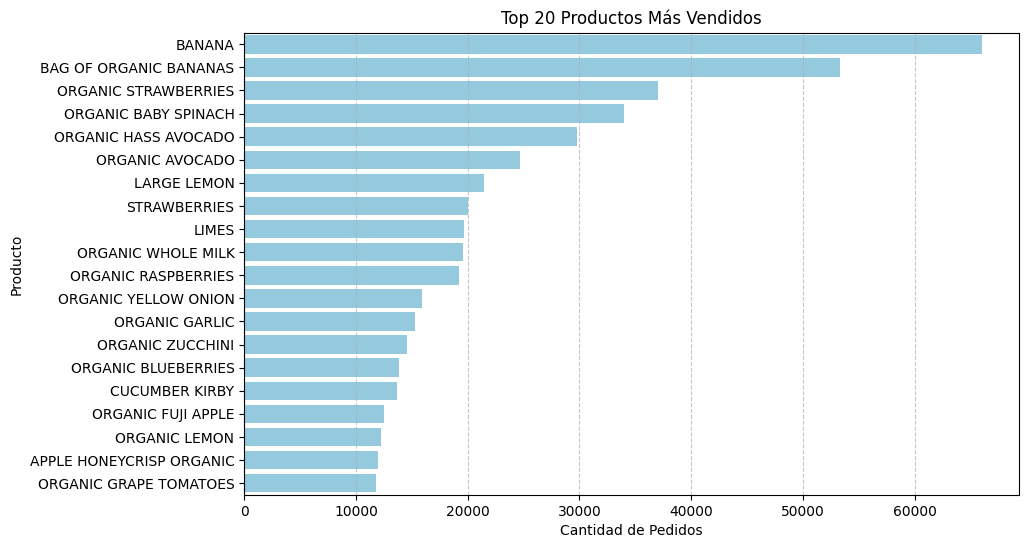

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, color='skyblue')
plt.title('Top 20 Productos Más Vendidos')
plt.xlabel('Cantidad de Pedidos')
plt.ylabel('Producto')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones

- El gráfico muestra que los productos más vendidos en la plataforma de Instacart son principalmente frutas y productos orgánicos. Las bananas lideran las ventas, seguidas por otros productos como fresas, espinacas y aguacates orgánicos. Esto sugiere que los clientes tienen una preferencia marcada por opciones saludables y frescas. Además, los productos de alta rotación suelen ser alimentos básicos que se compran con frecuencia.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo!La lista del TOP 20 es muy completa, has logrado no solo mostrar cuáles son los productos, sino resumir la cantidad de órdenes de cada producto de manera muy clara.
</div>


# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [100]:
items_per_order = df_reorder.groupby('order_id').size()
print(items_per_order)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Length: 450046, dtype: int64


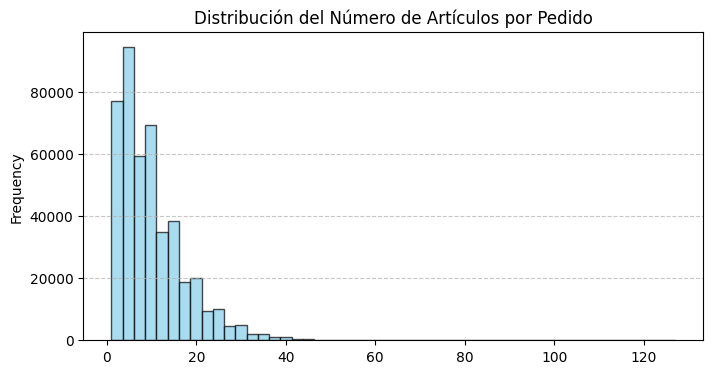

In [103]:
plt.figure(figsize=(8, 4))
items_per_order.plot(bins=50,
                      kind='hist',
                      color='skyblue', 
                      edgecolor='black', 
                      alpha=0.7,
                      xlabel='Número de Artículos por Pedido',
                      ylabel='Frecuencia',
                      title='Distribución del Número de Artículos por Pedido'
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones
- La mayoría de los pedidos contienen pocos artículos (menos de 10).
- A medida que aumenta el número de artículos en un pedido, la frecuencia disminuye significativamente.
- La cantidad más común de artículos por pedido parece estar entre 5 y 10.
- Hay algunos pedidos grandes (más de 40 artículos), pero son poco frecuentes.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buena visualización y cálculo de estadísiticos de la distribución.
</div>



### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [104]:
df_reordered = df_reorder[df_reorder['reordered'] == 1]

In [105]:
top_reordered = df_reordered['product_id'].value_counts().head(20).reset_index()
top_reordered.columns = ['product_id', 'reorder_count']

In [111]:
top_reordered = top_reordered.merge(df_product[['product_id', 'product_name']], on='product_id')
top_reordered = top_reordered[['product_id', 'reorder_count', 'product_name']]
top_reordered.head(20)

,product_id,reorder_count,product_name
0,24852,55763,BANANA
1,13176,44450,BAG OF ORGANIC BANANAS
2,21137,28639,ORGANIC STRAWBERRIES
3,21903,26233,ORGANIC BABY SPINACH
4,47209,23629,ORGANIC HASS AVOCADO
5,47766,18743,ORGANIC AVOCADO
6,27845,16251,ORGANIC WHOLE MILK
7,47626,15044,LARGE LEMON
8,27966,14748,ORGANIC RASPBERRIES
9,16797,13945,STRAWBERRIES


Escribe aquí tus conclusiones
- Como ya habíamos visto en el grafico del top de productos más vendidos, los productos más vendidos en la plataforma de Instacart son principalmente frutas y productos orgánicos.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo! Muy claros y concisos los datos.
</div>

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [112]:
total_orders = df_reorder.groupby('product_id').size().reset_index(name='total_orders')

In [117]:
total_reorders = df_reorder[df_reorder['reordered'] == 1].groupby('product_id').size().reset_index(name='total_reorders')
total_reorders.head()

,product_id,total_reorders
0,1,158
1,3,31
2,4,25
3,7,1
4,8,6


In [120]:
reorder_prop = total_orders.merge(total_reorders, on='product_id', how='left')

# Calcular la proporción de reordenamiento
reorder_prop['reorder_prop'] = reorder_prop['total_reorders'] / reorder_prop['total_orders']
reorder_prop['total_reorders'] = reorder_prop['total_reorders'].fillna(0)
reorder_prop = reorder_prop.merge(df_product[['product_id', 'product_name']], on='product_id', how='left')

reorder_prop.head(10)

,product_id,total_orders,total_reorders,reorder_prop,product_name
0,1,280,158.0,0.564286,CHOCOLATE SANDWICH COOKIES
1,2,11,0.0,NaN,ALL-SEASONS SALT
2,3,42,31.0,0.738095,ROBUST GOLDEN UNSWEETENED OOLONG TEA
3,4,49,25.0,0.510204,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4,7,2,1.0,0.500000,PURE COCONUT WATER WITH ORANGE
5,8,19,6.0,0.315789,CUT RUSSET POTATOES STEAM N' MASH
6,9,21,16.0,0.761905,LIGHT STRAWBERRY BLUEBERRY YOGURT
7,10,337,151.0,0.448071,SPARKLING ORANGE JUICE & PRICKLY PEAR BEVERAGE
8,11,16,10.0,0.625000,PEACH MANGO JUICE
9,12,41,16.0,0.390244,CHOCOLATE FUDGE LAYER CAKE


Escribe aquí tus conclusiones

- El resultado muestra la proporción de veces que un producto ha sido reordenado con respecto al total de pedidos en los que ha estado presente.
- El producto "LIGHT STRAWBERRY BLUEBERRY YOGURT" tiene una proporción de 0.76, lo que significa que el 76% de las veces que ha sido pedido, los clientes lo han vuelto a comprar.
- El "ROBUST GOLDEN UNSWEETENED OOLONG TEA" también tiene una proporción alta (0.73).
- Esto sugiere que estos productos son populares entre los clientes recurrentes, posiblemente porque son productos de consumo habitual.

In [1]:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo utilizando métricas tan complejas como lo son las proporciones. Bien hecho!</div>


SyntaxError: invalid syntax (2389582734.py, line 1)

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [121]:
df_merged = df_order[['order_id', 'user_id']].merge(df_reorder[['order_id', 'product_id', 'reordered']], on='order_id')
user_reorder_stats = df_merged.groupby('user_id').agg(
    total_products=('product_id', 'count'),
    total_reorders=('reordered', 'sum')
).reset_index()

In [122]:
user_reorder_stats['reorder_ratio'] = user_reorder_stats['total_reorders'] / user_reorder_stats['total_products']

user_reorder_stats.head()

,user_id,total_products,total_reorders,reorder_ratio
0,2,26,1,0.038462
1,4,2,0,0.000000
2,5,12,8,0.666667
3,6,4,0,0.000000
4,7,14,13,0.928571


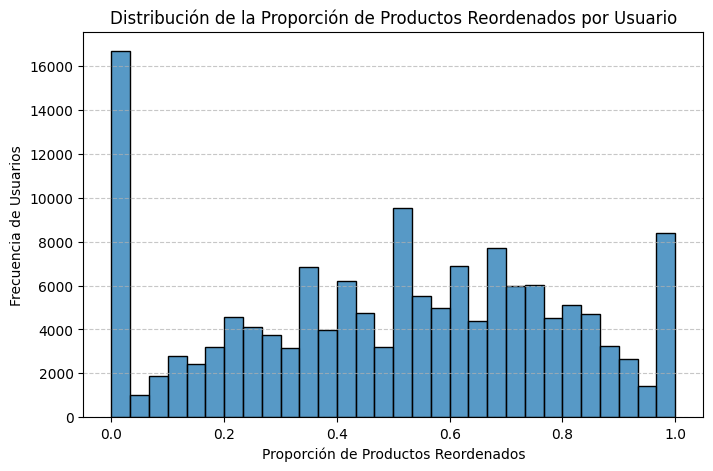

In [125]:
plt.figure(figsize=(8,5))
sns.histplot(user_reorder_stats['reorder_ratio'], bins=30)
plt.xlabel('Proporción de Productos Reordenados')
plt.ylabel('Frecuencia de Usuarios')
plt.title('Distribución de la Proporción de Productos Reordenados por Usuario')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones
# El histograma muestra que hay dos grupos bien marcados de usuarios:

- Usuarios que nunca reordenan productos (pico en 0). Es posible que sean nuevos clientes o que prefieran variar sus compras.
- Usuarios que casi siempre reordenan (pico en 1), lo que sugiere clientes leales con hábitos de compra repetitivos.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [126]:
df_merged = df_reorder.merge(df_product, on='product_id')

In [128]:
# Filtrado de los productos que fueron agregados primero al carrito
df_first_added = df_merged[df_merged['add_to_cart_order'] == 1]

In [130]:
top_first_added = df_first_added['product_name'].value_counts().head(20)
top_first_added.head(20)

BANANA                         15562
BAG OF ORGANIC BANANAS         11026
ORGANIC WHOLE MILK              4363
ORGANIC STRAWBERRIES            3946
ORGANIC HASS AVOCADO            3390
ORGANIC BABY SPINACH            3336
ORGANIC AVOCADO                 3044
SPRING WATER                    2336
STRAWBERRIES                    2308
ORGANIC RASPBERRIES             2024
SPARKLING WATER GRAPEFRUIT      1914
ORGANIC HALF & HALF             1797
LARGE LEMON                     1737
SODA                            1733
ORGANIC REDUCED FAT MILK        1397
LIMES                           1370
HASS AVOCADOS                   1340
ORGANIC REDUCED FAT 2% MILK     1310
HALF & HALF                     1309
ORGANIC YELLOW ONION            1246
Name: product_name, dtype: int64

Escribe aquí tus conclusiones
- Los productos más agregados primero al carrito tienden a ser productos básicos y de consumo frecuente.
- El plátano ("BANANA") es el más común, con una diferencia notable respecto al resto. Probablemente porque es un alimento esencial y accesible.
- Otros productos populares incluyen frutas y productos orgánicos como "BAG OF ORGANIC BANANAS", "ORGANIC STRAWBERRIES" y "ORGANIC AVOCADO".

### Conclusion general del proyecto:

# Patrones de Compra

- Se identificaron tendencias en los productos más comprados y reordenados, destacando la preferencia por alimentos básicos y orgánicos.

# Hábitos de Reordenamiento

- No todos los usuarios reordenan productos con la misma frecuencia; algunos tienen compras recurrentes, mientras que otros exploran nuevos artículos en cada pedido.

# Comportamiento al Agregar Productos

- Los primeros artículos en el carrito suelen ser productos esenciales, lo que puede indicar su importancia en la decisión de compra.